In [1]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots


#             1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
stoi_mat = [  1  -1  0  -1  1;
              0  1  -1  -1  1;
              0  0  0    1  -1;
              0  0  0    1  -1;
]


function schematic_PowerLaw(du, u, p, t)
  f = [1, u[1]/(10+u[1]), u[2]/(10+u[2]), (u[1]/(10+u[1]))*(u[2]/(10+u[2])), (u[3]/(10+u[3]))*(u[4]/(10+u[4]))]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
end

p1 = [0.2 * 300 * 2, 
    0.4 * 300* 2, 
    0.6 * 300* 2, 
    0.5 * 300* 2, 
    0.2 * 300* 2]


#u0 = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#      10, 10, 10, 10,  5,  10, 5, 10, 10, 10,
#      10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

#u0 = [  9.999968489784175,
#  4.999945391093676,
# 18.20854654621529,
# 18.20854654621529]   
u0 = [9.99999,   4.99999,  19.8097,  16.8097]    
    

tspan1 = (0.0, 10.0)

prob1 = ODEProblem(schematic_PowerLaw,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'

49×4 adjoint(::Matrix{Float64}) with eltype Float64:
  9.99999  4.99999  19.8097  16.8097
  9.9997   4.99948  19.8099  16.8099
  9.9999   4.99983  19.8098  16.8098
  9.99997  4.99995  19.8097  16.8097
  9.99998  4.99997  19.8097  16.8097
  9.99998  4.99996  19.8097  16.8097
  9.99997  4.99995  19.8097  16.8097
  9.99997  4.99994  19.8097  16.8097
  9.99996  4.99994  19.8097  16.8097
  9.99996  4.99994  19.8097  16.8097
  ⋮                          
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
  9.99997  4.99994  19.8098  16.8098
 10.0      5.0      19.8097  16.8097

In [23]:
length1 = size(sol_mat1)[1]

49

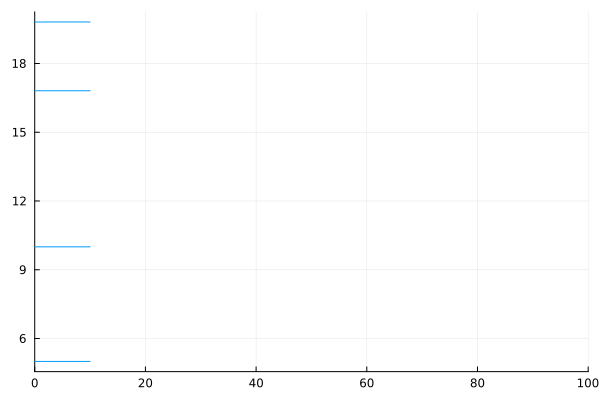

In [24]:
plot(sol1.t[1:length1], sol_mat1[1:length1, 1:4], xlims = (0, 100), label = "", color = 1)

In [25]:
sol_mat1[length1,:]

4-element Vector{Float64}:
  9.99999832990896
  4.999997107954107
 19.80972806766773
 16.80972806766773

In [26]:
flux_mat1 = zeros((size(sol_mat1)[1], 5))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [1, u[1]/(10+u[1]), u[2]/(10+u[2]), (u[1]/(10+u[1]))*(u[2]/(10+u[2])), (u[3]/(10+u[3]))*(u[4]/(10+u[4]))]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end

10.0

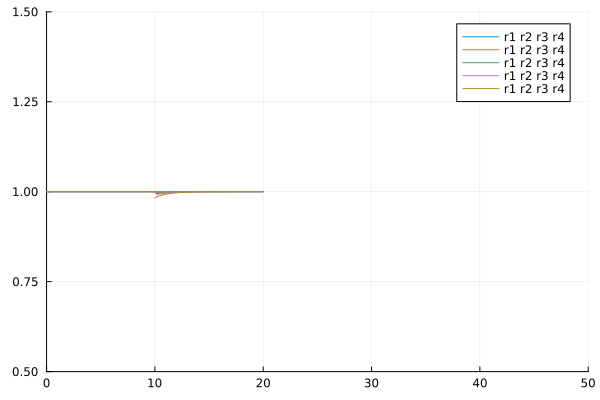

In [27]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[3] = u02[3]-1
tspan2 = (10.0, 20.0)
print(sol1.t[length1])

prob2 = ODEProblem(schematic_PowerLaw,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 5))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]/(10+u[1]), u[2]/(10+u[2]), (u[1]/(10+u[1]))*(u[2]/(10+u[2])), (u[3]/(10+u[3]))*(u[4]/(10+u[4]))]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,1:5], xlims = (0, 50), ylim = (0.5, 1.5), label = "", color = [1 2 3 4 5])
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

10.0

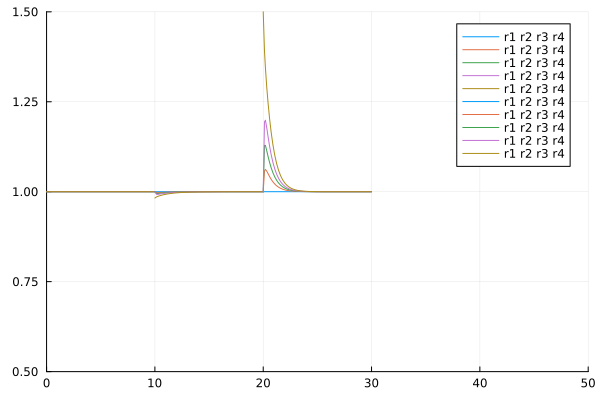

In [28]:
p3 = copy(p2)
u03 = sol_mat2[length2,:]
p3[5] = 1.5 * p3[5]
tspan3 = (20.0, 30.0)
print(sol1.t[length1])

prob3 = ODEProblem(schematic_PowerLaw,u03,tspan3,p3)
sol3 = solve(prob3, Vern9())
sol_mat3 = reduce(hcat,sol3.u)'

length3 = size(sol_mat3)[1]
flux_mat3 = zeros((size(sol_mat3)[1], 5))
for i in 1:size(sol_mat3)[1]
  u = copy(sol_mat3[i,:])
  f3 = [1, u[1]/(10+u[1]), u[2]/(10+u[2]), (u[1]/(10+u[1]))*(u[2]/(10+u[2])), (u[3]/(10+u[3]))*(u[4]/(10+u[4]))]
  r3 = p3 .* f3
  flux_mat3[i,:] = r3
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
end

plot!(sol3.t[1:length3], norm_flux_mat3[1:length3,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

In [29]:
p4 = copy(p3)
u04 = sol_mat3[length3,:]
p4[1] = 1.2 * p4[1]
tspan4 = (30.0, 50.0)
print(sol1.t[length1])

prob4 = ODEProblem(schematic_PowerLaw,u04,tspan4,p4)
sol4 = solve(prob4, Vern9())
sol_mat4 = reduce(hcat,sol4.u)'

length4 = size(sol_mat4)[1]
flux_mat4 = zeros((size(sol_mat4)[1], 5))
for i in 1:size(sol_mat4)[1]
  u = copy(sol_mat4[i,:])
  f4 = [1, u[1]/(10+u[1]), u[2]/(10+u[2]), (u[1]/(10+u[1]))*(u[2]/(10+u[2])), (u[3]/(10+u[3]))*(u[4]/(10+u[4]))]
  r4 = p4 .* f4
  flux_mat4[i,:] = r4
end

10.0

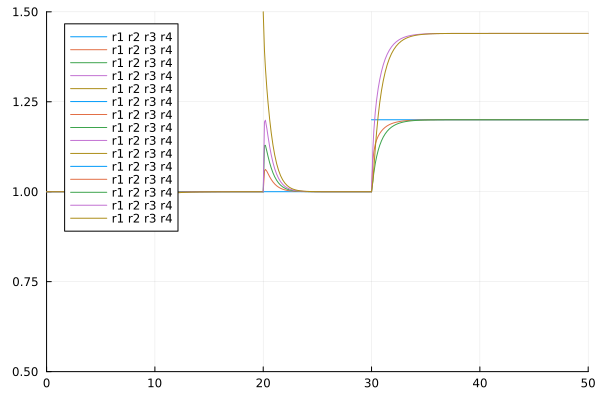

In [30]:


norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))
norm_flux_mat4 = zeros(size(flux_mat4))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
  norm_flux_mat4[:,j] = flux_mat4[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))
norm_sol_mat4 = zeros(size(sol_mat4))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
  norm_sol_mat4[:,j] = sol_mat4[:,j] / sol_mat1[end,j]
end

plot!(sol4.t[1:length4], norm_flux_mat4[1:length4,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])